# Perform Principal component analysis and perform clustering using first 
3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain 
optimum number of clusters and check whether we have obtained same number of clusters with the original data 
(class column we have ignored at the begining who shows it has 3 clusters)df

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
wine=pd.read_csv("D:/Datasets/wine.csv")
wine.head(10)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [3]:
wine.shape

(178, 14)

In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Type               178 non-null int64
Alcohol            178 non-null float64
Malic              178 non-null float64
Ash                178 non-null float64
Alcalinity         178 non-null float64
Magnesium          178 non-null int64
Phenols            178 non-null float64
Flavanoids         178 non-null float64
Nonflavanoids      178 non-null float64
Proanthocyanins    178 non-null float64
Color              178 non-null float64
Hue                178 non-null float64
Dilution           178 non-null float64
Proline            178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
wine.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Type,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoids,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


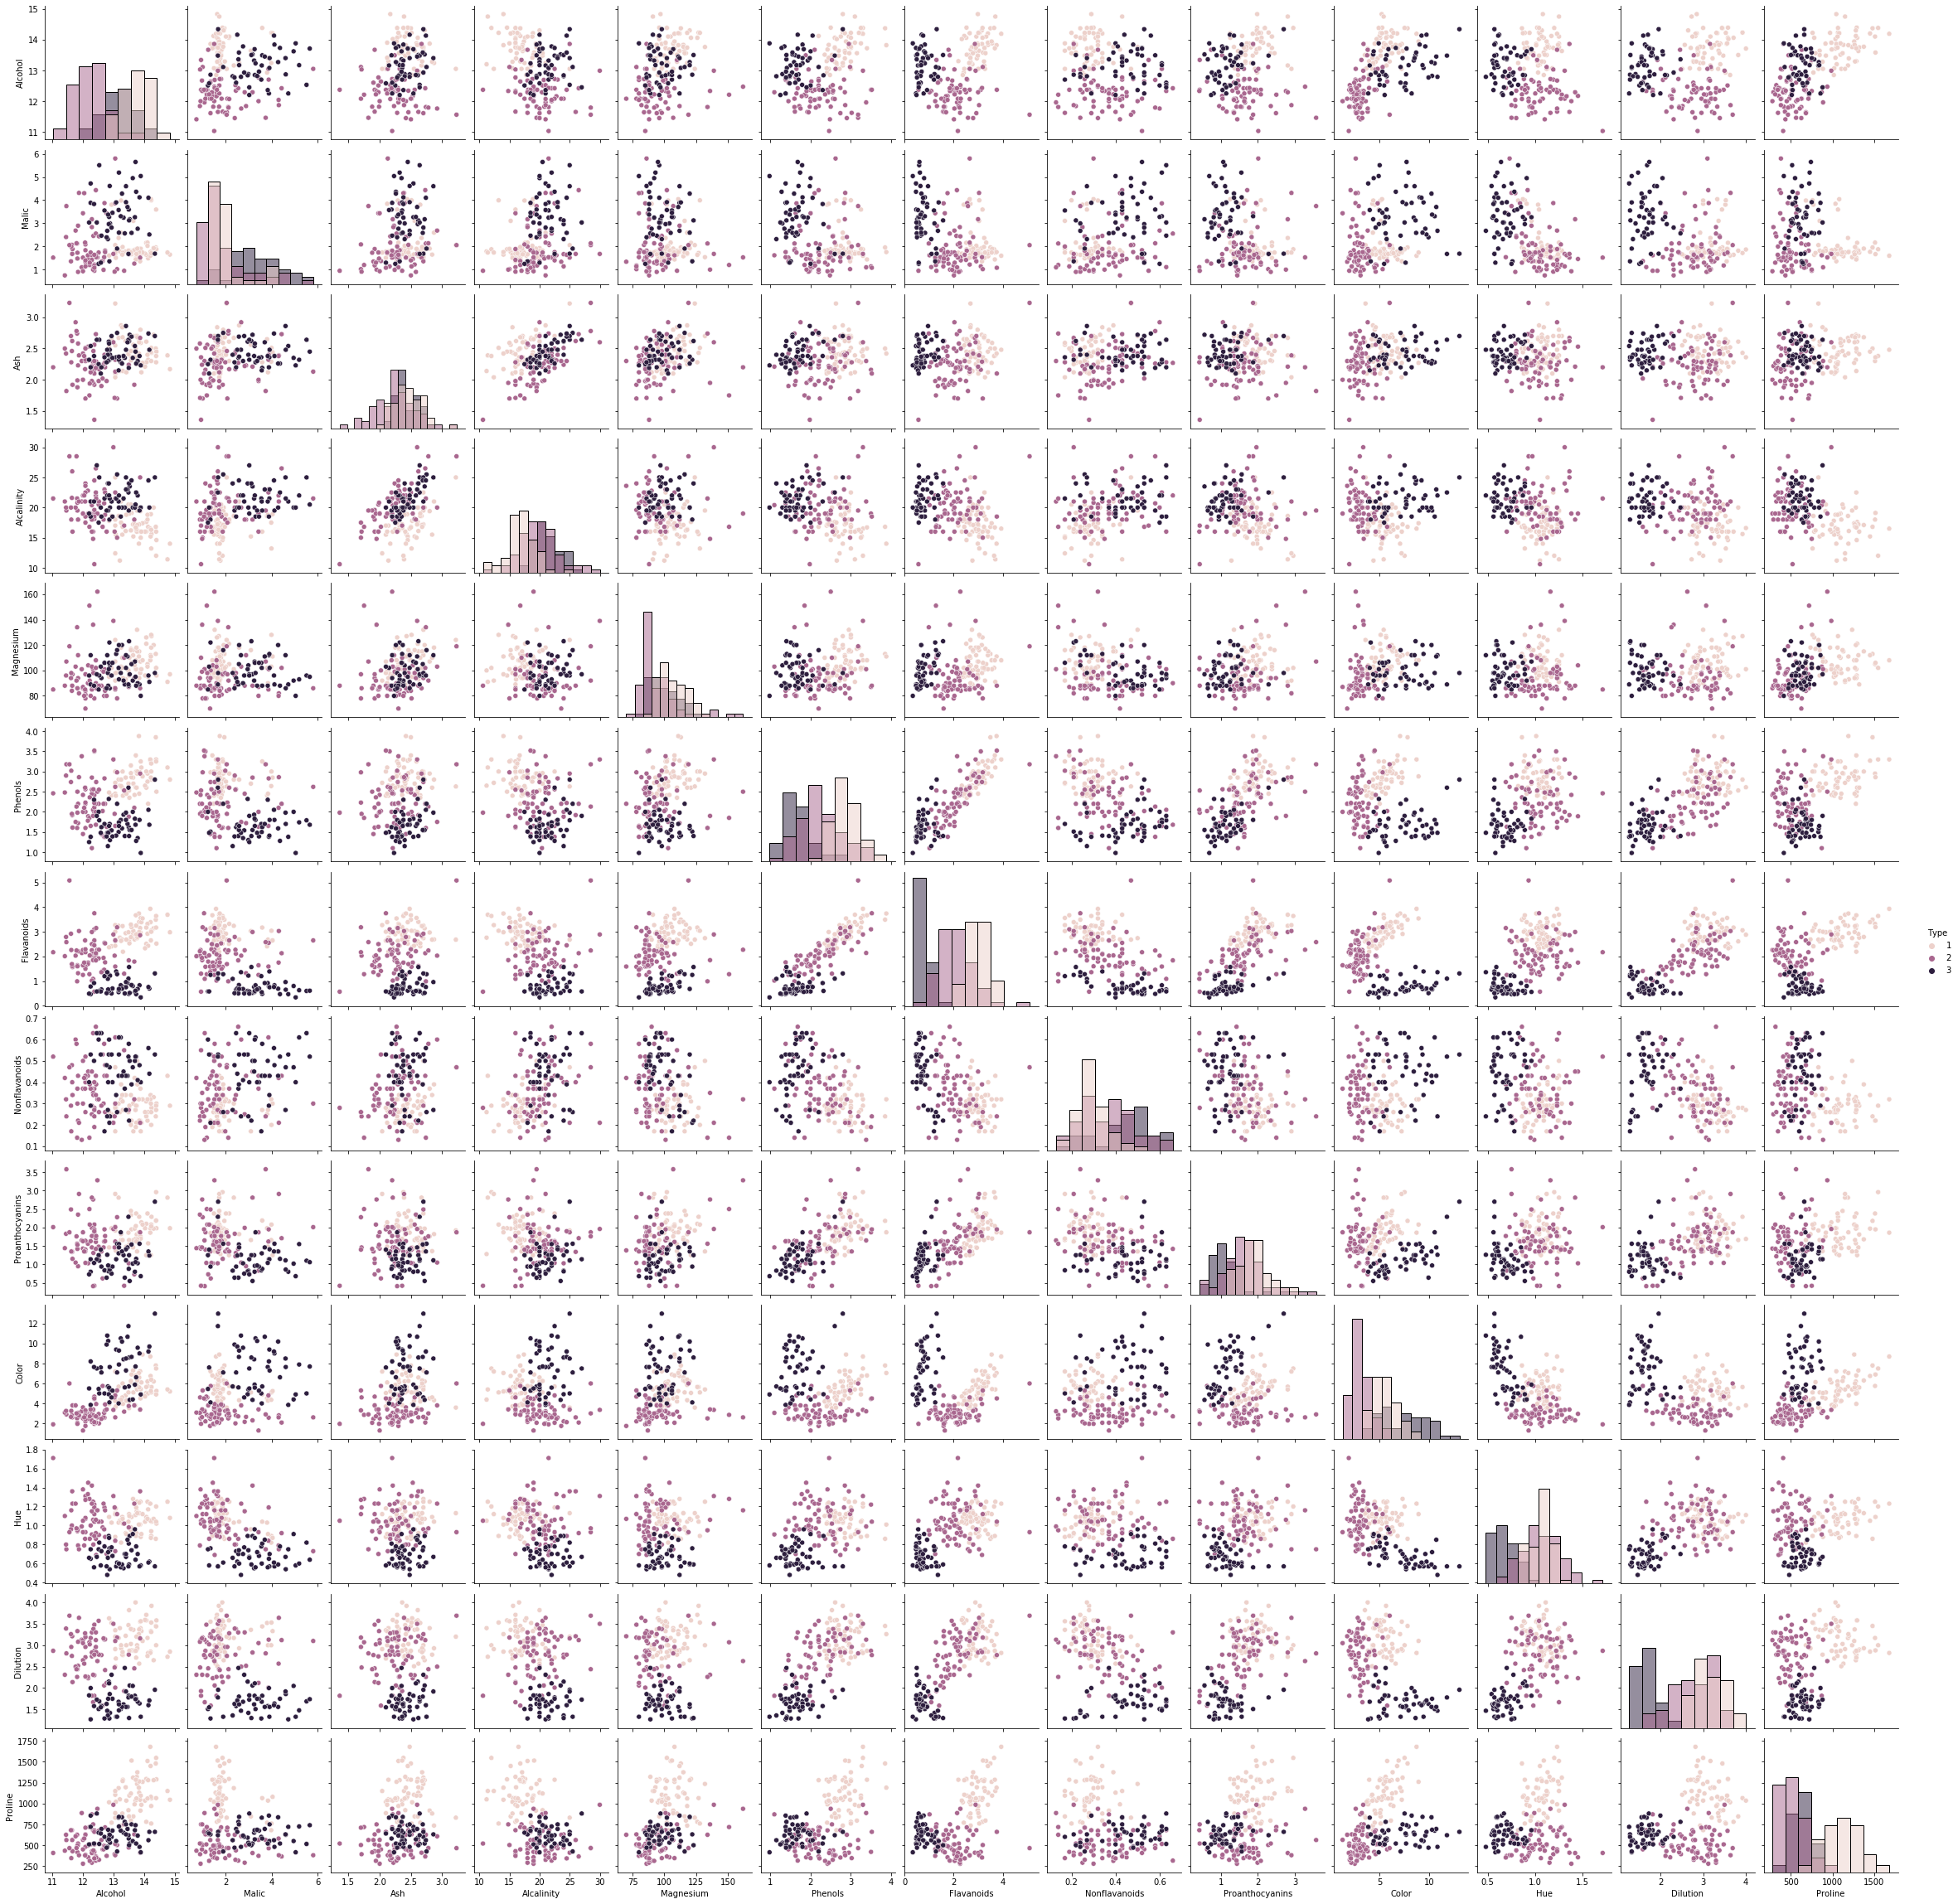

In [6]:
sns.pairplot(data=wine,diag_kind='hist',hue='Type')

In [7]:
wine.nunique()

Type                 3
Alcohol            126
Malic              133
Ash                 79
Alcalinity          63
Magnesium           53
Phenols             97
Flavanoids         132
Nonflavanoids       39
Proanthocyanins    101
Color              132
Hue                 78
Dilution           122
Proline            121
dtype: int64

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [9]:
wine1=wine.iloc[:,1:]
wine1

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [10]:
#Standardize the data
wine_nor=scale(wine)

In [11]:
wine_nor

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [12]:
pca=PCA(n_components=13)
pca_values=pca.fit_transform(wine_nor)
pca_values

array([[-3.52293390e+00, -1.45309844e+00, -1.64795488e-01, ...,
        -4.20493905e-01,  5.52927766e-01, -3.02978176e-01],
       [-2.52885806e+00,  3.30019252e-01, -2.02670665e+00, ...,
        -1.30019629e-01,  3.94971160e-01, -1.46645308e-01],
       [-2.78502898e+00, -1.03693595e+00,  9.83237703e-01, ...,
        -2.79074108e-01,  1.89799314e-03,  2.12780166e-02],
       ...,
       [ 3.02727243e+00, -2.75604024e+00, -9.40803036e-01, ...,
         5.02640272e-01,  6.93336340e-01,  1.67035660e-01],
       [ 2.75522166e+00, -2.29378408e+00, -5.50473677e-01, ...,
         3.13785741e-01,  3.44119826e-01, -1.09514873e-01],
       [ 3.49633565e+00, -2.76060799e+00,  1.01315115e+00, ...,
        -2.38282390e-01, -1.89866131e-01, -1.64090011e-01]])

In [13]:
#Varince
var=pca.explained_variance_ratio_
var

array([0.39542486, 0.17836259, 0.10329102, 0.06627984, 0.06267875,
       0.0480556 , 0.03955707, 0.02500244, 0.02103871, 0.01873615,
       0.01613203, 0.01205691, 0.00925458])

In [14]:
print(pca.components_[0])
pca.components_[1]

[ 0.39366953 -0.13632501  0.22267638 -0.00225793  0.22429849 -0.12463016
 -0.35926404 -0.39071171  0.2670012  -0.2790625   0.08931829 -0.27682265
 -0.35052618 -0.26951525]


array([-0.00569041, -0.48416087, -0.22359095, -0.31585588,  0.01161574,
       -0.30055143, -0.06711983,  0.00131345, -0.0269887 , -0.04122256,
       -0.52978274,  0.27790735,  0.16277625, -0.36605886])

In [15]:
var1=np.cumsum(np.round(var,decimals = 4)*100)
var1

array([39.54, 57.38, 67.71, 74.34, 80.61, 85.42, 89.38, 91.88, 93.98,
       95.85, 97.46, 98.67, 99.6 ])

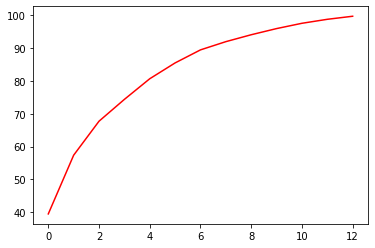

In [16]:
plt.plot(var1,color="red")

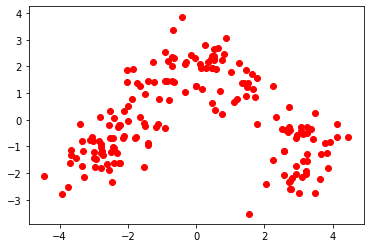

In [17]:
x = pca_values[:,0]
y = pca_values[:,1]
plt.scatter(x,y,color=["red"])

([array([1., 0., 1., 3., 4., 3., 0., 1., 0., 0.]),
  array([1., 2., 4., 5., 0., 0., 1., 0., 0., 0.]),
  array([1., 1., 2., 1., 4., 2., 0., 2., 0., 0.]),
  array([1., 0., 3., 4., 2., 1., 1., 0., 1., 0.]),
  array([0., 1., 1., 2., 4., 3., 0., 1., 1., 0.]),
  array([0., 0., 2., 3., 3., 3., 1., 0., 0., 1.]),
  array([0., 3., 2., 2., 1., 3., 2., 0., 0., 0.]),
  array([0., 1., 0., 5., 3., 3., 0., 0., 1., 0.]),
  array([0., 2., 0., 1., 3., 2., 4., 0., 1., 0.]),
  array([0., 1., 2., 2., 1., 3., 1., 3., 0., 0.]),
  array([1., 0., 2., 2., 5., 1., 0., 1., 1., 0.]),
  array([2., 1., 2., 2., 3., 1., 2., 0., 0., 0.]),
  array([0., 2., 1., 3., 2., 3., 0., 1., 1., 0.]),
  array([0., 1., 2., 6., 2., 0., 0., 0., 2., 0.])],
 array([-0.59841948, -0.46074448, -0.32306949, -0.18539449, -0.0477195 ,
         0.0899555 ,  0.22763049,  0.36530549,  0.50298049,  0.64065548,
         0.77833048]),
 <a list of 14 Lists of Patches objects>)

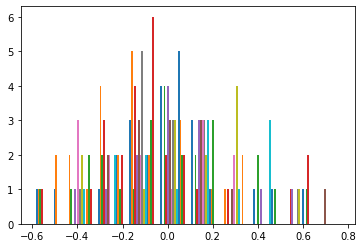

In [18]:
plt.hist(pca.components_)

In [19]:
df=pd.DataFrame(pca_values[:,0:3])
df

,0,1,2
0,-3.522934,-1.453098,-0.164795
1,-2.528858,0.330019,-2.026707
2,-2.785029,-1.036936,0.983238
3,-3.922588,-2.768210,-0.174968
4,-1.407511,-0.867773,2.025829
...,...,...,...
173,3.627996,-2.206617,-0.343668
174,2.942729,-1.752263,0.207480
175,3.027272,-2.756040,-0.940803
176,2.755222,-2.293784,-0.550474


In [22]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as SCH
from sklearn.cluster import AgglomerativeClustering

In [23]:
wine1=wine.copy()
 
hcomplete=AgglomerativeClustering(n_clusters=3,linkage='complete',affinity = "euclidean").fit(df) 
hcomplete.labels_
clust=pd.Series(hcomplete.labels_)

In [24]:
wine1["ClustPca"]=clust
wine1.groupby(clust).mean()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ClustPca
0,1.447619,13.054381,2.039619,2.429048,19.010476,101.695238,2.629524,2.662381,0.325333,1.850667,4.416381,1.057333,3.034857,848.419048,0.0
1,2.979167,13.157708,3.386042,2.437083,21.510417,98.541667,1.681667,0.788542,0.455833,1.167708,7.410833,0.684375,1.698542,627.500000,1.0
2,2.000000,12.473200,1.567200,1.968400,17.660000,93.840000,2.068400,1.752400,0.334800,1.312400,3.236000,1.062240,2.587600,549.720000,2.0


In [25]:
# Clustering analysis for Hierarchy with orginial data set
wine1.drop(["Type"],inplace=True,axis = 1)

In [26]:
def norm_fun (i):
    x=(i-i.min())/ (i.max() - i.min())
    return (x)

Norm =norm_fun(wine1.iloc[:,1:])
Norm.describe()

z= linkage(Norm, method="complete",metric="euclidean")

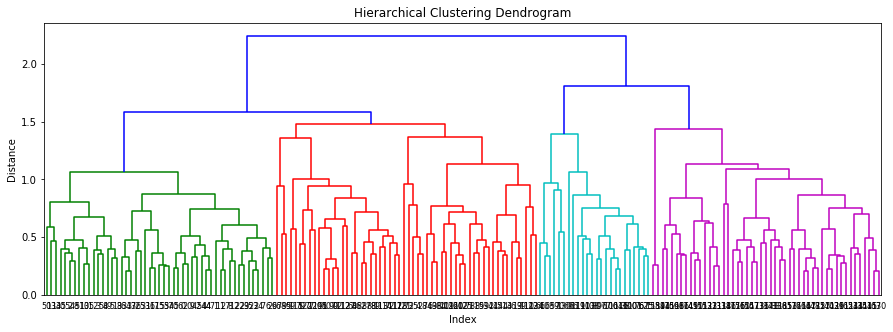

In [27]:
#plottiing dendogram
plt.figure(figsize=(15, 5));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
SCH.dendrogram(
    z,
    leaf_rotation=0.,  
    leaf_font_size=8.,  
)
plt.show()

In [31]:
complete1=AgglomerativeClustering(n_clusters=3,linkage='complete',affinity = "euclidean").fit(Norm) 
complete1.labels_

clust1=pd.Series(complete1.labels_)

wine1["ClustOrg"]=clust1

#cluster for Orginial data 
wine1.iloc[:,1:13].groupby(wine1.ClustOrg).mean()

,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
ClustOrg,,,,,,,,,,,,
0,2.039619,2.429048,19.010476,101.695238,2.629524,2.662381,0.325333,1.850667,4.416381,1.057333,3.034857,848.419048
1,3.386939,2.427755,21.397959,98.163265,1.680612,0.797959,0.455306,1.160816,7.328980,0.684694,1.707143,622.285714
2,1.489583,1.967917,17.729167,94.416667,2.086667,1.773333,0.330833,1.332500,3.229167,1.077333,2.607083,557.125000


In [32]:
#cluster for Pca values
wine1.iloc[:,1:13].groupby(wine1.ClustPca).mean()

,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
ClustPca,,,,,,,,,,,,
0,2.039619,2.429048,19.010476,101.695238,2.629524,2.662381,0.325333,1.850667,4.416381,1.057333,3.034857,848.419048
1,3.386042,2.437083,21.510417,98.541667,1.681667,0.788542,0.455833,1.167708,7.410833,0.684375,1.698542,627.500000
2,1.567200,1.968400,17.660000,93.840000,2.068400,1.752400,0.334800,1.312400,3.236000,1.062240,2.587600,549.720000


In [33]:
#Kmeans
wine2=wine.copy()

wine2.drop(["Type"],inplace= True,axis= 1)

def norm_fun1(i):
    x=(i-i.min())/ (i.max() - i.min())
    return (x)

Norm1=norm_fun1(wine2.iloc[:,1:])
Norm1.describe()


([<matplotlib.axis.XTick at 0x1fbe25c6208>,
 <a list of 8 Text xticklabel objects>)

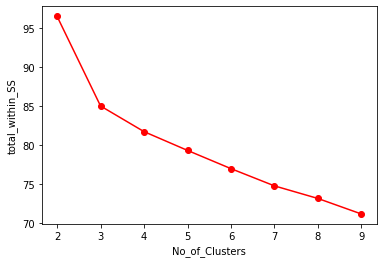

In [34]:
from sklearn.cluster import	KMeans
from scipy.spatial.distance import cdist 

K=list(range(2,10))
K



TWSS= []
for i in K:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(Norm1)
    WSS = [] 
    for j in range(i):
        WSS.append(sum(cdist(Norm1.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,Norm1.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))
    
    

plt.plot(K,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(K)
#from scree plot the eblow point is 3 


In [36]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(Norm1)
kmeans.labels_

kclust=pd.Series(kmeans.labels_)

wine2["KclustOrg"]=kclust


kmeansPCa = KMeans(n_clusters = 3)
kmeansPCa.fit(df)
kmeansPCa.labels_

KclustP=pd.Series(kmeansPCa.labels_)

wine2["KclustPca"]=KclustP

#CLuster for Orginal Data
wine2.iloc[:,1:13].groupby(wine2.KclustOrg).mean()




,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
KclustOrg,,,,,,,,,,,,
0,1.988169,2.426056,17.654930,106.732394,2.865634,2.971408,0.283521,1.975070,5.211690,1.055915,3.158451,1037.281690
1,3.274615,2.413654,21.225000,98.750000,1.672692,0.822692,0.450385,1.151923,7.154231,0.696077,1.699038,623.884615
2,1.898727,2.245091,20.234545,91.654545,2.147091,1.953818,0.379273,1.510000,2.878000,1.077455,2.768727,488.327273


In [37]:

#Cluster for Pca values
wine2.iloc[:,1:13].groupby(wine2.KclustPca).mean()


,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
KclustPca,,,,,,,,,,,,
0,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806
1,1.912239,2.224328,19.953731,92.656716,2.235075,2.028507,0.361343,1.597313,3.020896,1.056060,2.775075,507.208955
2,3.344490,2.434694,21.438776,99.020408,1.678163,0.797959,0.450816,1.163061,7.343265,0.685918,1.690204,627.551020


# according the cluster analysis of both orginal data  and pca values,the values of cluster shows nearrest to equal. 
#but in some cluster the values of clust in both pca values and orginal data tends to show interchanged values
#This is because of orginal data has more accuracy when compared to pca values since we are using here only of 66% of data in PCA
# In terms of performance PCA is more ahead than orginial data analysis 